Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the train‐
ing data, but also to fit an additional constraint. We also want the magnitude of coef‐
ficients to be as small as possible; in other words, all entries of w should be close to
zero.

This constraint is an example of what is called regularization. Regularization means explic‐
itly restricting a model to avoid overfitting. The particular kind used by ridge regres‐
sion is known as L2 regularization.

In [8]:
import sklearn
import mglearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from mglearn.datasets import load_extended_boston
X,y=load_extended_boston()
import matplotlib.pyplot as plt 

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
ridge = Ridge().fit(X_train,y_train)

print(f"training set score {ridge.score(X_train,y_train)}")
print(f"Test set score {ridge.score(X_test,y_test)}")

training set score 0.885796658517094
Test set score 0.7527683481744755


A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization perfor‐
mance, we should choose the Ridge model over the LinearRegression model.

How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. In the previous example, we used the default param‐
eter alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [5]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"training set score {ridge10.score(X_train,y_train)}")
print(f"Test set score {ridge10.score(X_test,y_test)}")

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"training set score {ridge01.score(X_train,y_train)}")
print(f"Test set score {ridge01.score(X_test,y_test)}")

lr = LinearRegression().fit(X_train, y_train)


training set score 0.7882787115369615
Test set score 0.6359411489177311
training set score 0.9282273685001985
Test set score 0.7722067936480137


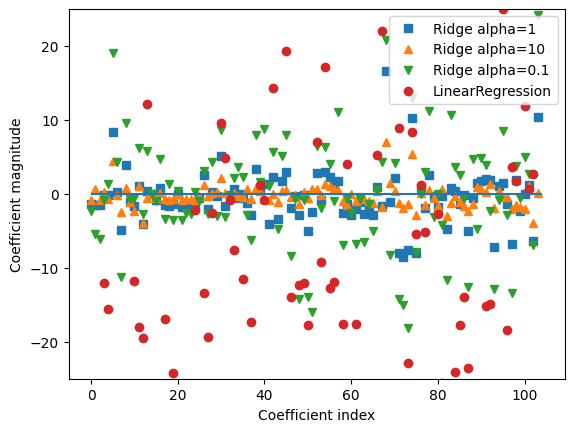

In [9]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_,
'^'
, label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

with enough training data, regularization becomes less important,